**LABB 1**

Johannes Hedström

2023-04-04

In [ ]:
# Import needed libraries
import tensorflow as tf
print('TensorFlow version:', tf.__version__)

# from tensorflow import keras
# from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.utils  import to_categorical

#print('Keras version:',tf.keras.__version__)

# Helper libraries
import numpy as np
import sklearn
from   sklearn.model_selection import train_test_split

# Matlab plotting
import matplotlib
import matplotlib.pyplot as plt


TensorFlow version: 2.12.0


**Läser in datamaterialet**



In [ ]:
# Get Fashion-MNIST training and test data from Keras database (https://keras.io/datasets/)
(train_images0, train_labels0), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Define labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Split the training set into a training and a validation set (20% is validation)
train_images, val_images, train_labels, val_labels = train_test_split(train_images0, train_labels0, test_size=0.20)

In [ ]:
# Print som basic information of data set sizes and data sizes
train_no,x,y = train_images.shape
print('No training images:',train_no, ' with image size:',x,'x',y)
label_no = len(train_labels)
if (label_no != train_no) :
  print('# labels do not match # training images')

test_no,x,y = test_images.shape
label_no = len(test_labels)
print('No test images:',test_no)
if (label_no != test_no) :
  print('# labels do not match # test images')

val_no,x,y = val_images.shape
label_no = len(val_labels)
print('No val images:',val_no)
if (label_no != val_no) :
  print('# labels do not match # val images')

classes = np.unique(train_labels)
num_classes = len(classes)
print('Training labels:', np.unique(train_labels), "; That is,", num_classes,"classes." )

No training images: 48000  with image size: 28 x 28
No test images: 10000
No val images: 12000
Training labels: [0 1 2 3 4 5 6 7 8 9] ; That is, 10 classes.


Ovan visas storleken på träning, validering och testmängderna som kommer användas för att träna och validera modellerna och sedan testa.
Sedan plottas 2 bilder för att förstå hur en bild i datamaterialet kan se ut.

In [ ]:
# Add an "empty" color dimension for our data sets
train_images = np.expand_dims(train_images, -1)
val_images = np.expand_dims(val_images, -1)
test_images = np.expand_dims(test_images, -1)

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
val_images = (val_images / 255) - 0.5

Label: Trouser


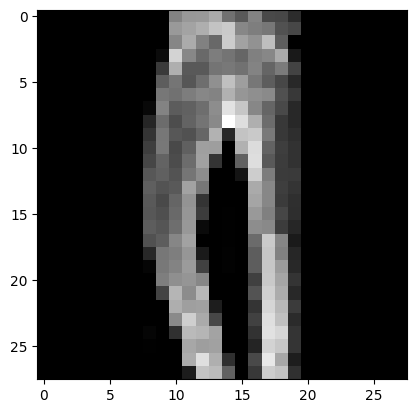

Label: Dress


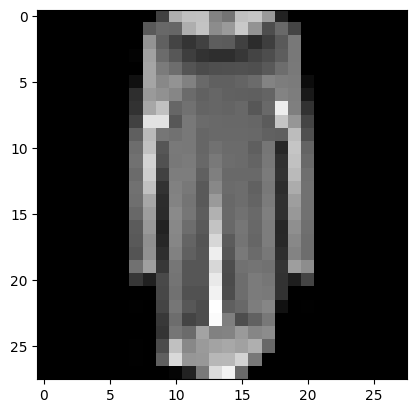

In [ ]:
# As these are images (28x28) it can be interesting to plot some as images
image_index = [42, 789] # "Random" images to print

for index in image_index:
  print( 'Label:', class_names[train_labels[index]])
  plt.figure()
  plt.imshow(np.squeeze(train_images[index], axis=-1))
  plt.gray()
  plt.grid(False)
  plt.show(block=False)

Base-modellen labben utgår ifrån skapas nedan

In [ ]:
# We need to give the input shape (i.e. our image shape) to our model
input_shape = test_images[0].shape
print("Input shape", input_shape)

# The Keras model will be the simplest Keras model for NN networks.
# It is a single stack of layers connected sequentially.
model = Sequential([

# Add a convolution layer
Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),

# Flatten the input. This prepares the vector for fully connected layers.
Flatten(),

# Add a hidden Dense layer
Dense(units=16, activation='relu'),

# Add a an output layer. The output space is the number of classes
#    Softmax makes the output as probablity vector of the different classes
Dense(units=num_classes, activation='softmax')

])

model.summary()

Input shape (28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 16)                200720    
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 201,050
Trainable params: 201,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model, as a preparation for training
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['categorical_accuracy']
)

In [ ]:
epochs = 15      ## Number of epoch to run
batch_size = 32  ## Mini batch size

# Train the model.
history = model.fit(
  train_images, to_categorical(train_labels),
  epochs=epochs,
  batch_size=batch_size,
  verbose = 1,
  validation_data=(val_images, to_categorical(val_labels))
)

Epoch 1/15
1500/1500 [==============================] - 34s 22ms/step - loss: 0.6458 - categorical_accuracy: 0.7771 - val_loss: 0.4033 - val_categorical_accuracy: 0.8582
Epoch 2/15
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3524 - categorical_accuracy: 0.8755 - val_loss: 0.3536 - val_categorical_accuracy: 0.8760
Epoch 3/15
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3053 - categorical_accuracy: 0.8920 - val_loss: 0.3125 - val_categorical_accuracy: 0.8901
Epoch 4/15
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2735 - categorical_accuracy: 0.9032 - val_loss: 0.3180 - val_categorical_accuracy: 0.8878
Epoch 5/15
1500/1500 [==============================] - 23s 16ms/step - loss: 0.2508 - categorical_accuracy: 0.9107 - val_loss: 0.2989 - val_categorical_accuracy: 0.8978
Epoch 6/15
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2310 - categorical_accuracy: 0.9165 - val_loss: 0.3108 - val_categoric

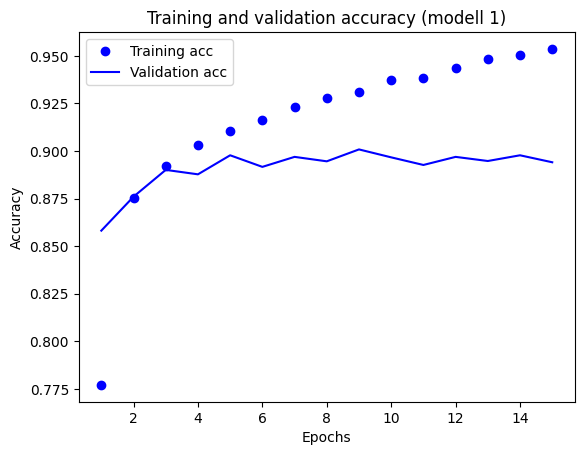

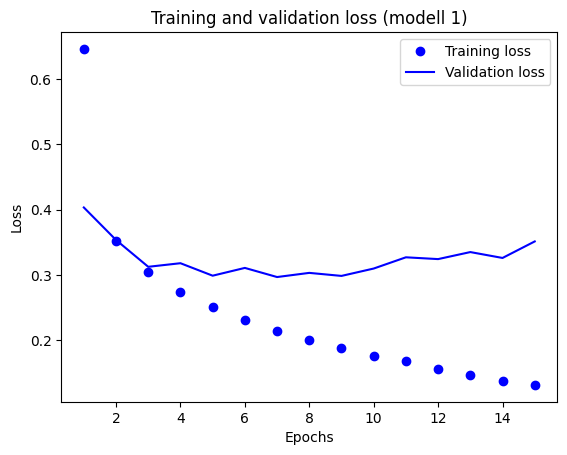

In [ ]:
epochrange = range(1, epochs + 1)
train_acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochrange, train_acc, 'bo', label='Training acc')
plt.plot(epochrange, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (modell 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochrange, train_loss, 'bo', label='Training loss')
plt.plot(epochrange, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (modell 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(test_images,to_categorical(test_labels))
print('Test accuracy: %.3f' % test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3530 - categorical_accuracy: 0.8967
Test accuracy: 0.897


# Uppgift 1

**DEL 1A**

* Totala antalet parametrar är 201,050 stycken
* Testets noggrannhet är 89.7%
* Det ser inte ut som att modellen tränat färdigt då träningskurvan inte konvergerat
* Sett till prestationen på valideringsdatat så är det rimligt med 3 epoker, för sedan överanpassar modellen på träningsmängden.

**DEL 1B**



In [ ]:
# The Keras model will be the simplest Keras model for NN networks.
# It is a single stack of layers connected sequentially.
model = Sequential([

# Add a convolution layer
Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),
### Lagt ett faltningslager och ändrar kärnor till 5
Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),
### Lagt till ännu ett faltningslager men med 32 filters
Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),

### Lagt till ännu ett faltningslager men med 32 filters
Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),

# Flatten the input. This prepares the vector for fully connected layers.
Flatten(),

# Add a hidden Dense layer
Dense(units=16, activation='relu'),


# Add a an output layer. The output space is the number of classes
#    Softmax makes the output as probablity vector of the different classes
Dense(units=num_classes, activation='softmax')

])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['categorical_accuracy']
)

epochs = 15      ## Number of epoch to run
batch_size = 32  ## Mini batch size

"""
### Importerar earlystopping och skapar earlystop för att stanna träningen när överanpassning sker och låter den gå 3 epoker till för att tillåta att några steg i "fel" riktning
"""
from keras.callbacks import EarlyStopping
earlystop= EarlyStopping(monitor='val_loss', patience=3)


# Train the model.
history = model.fit(
  train_images, to_categorical(train_labels),
  epochs=epochs,
  batch_size=batch_size,
  verbose = 1,
  validation_data=(val_images, to_categorical(val_labels)),
  callbacks=[earlystop] # Lägger in earlystopping i träningen
)

# Evaluate the model.
test_loss, test_acc = model.evaluate(test_images,to_categorical(test_labels))
print('Test accuracy: %.3f' % test_acc)

Epoch 1/15
1500/1500 [==============================] - 77s 51ms/step - loss: 0.5814 - categorical_accuracy: 0.7868 - val_loss: 0.3908 - val_categorical_accuracy: 0.8547
Epoch 2/15
1500/1500 [==============================] - 70s 47ms/step - loss: 0.3595 - categorical_accuracy: 0.8676 - val_loss: 0.3363 - val_categorical_accuracy: 0.8750
Epoch 3/15
1500/1500 [==============================] - 68s 46ms/step - loss: 0.3028 - categorical_accuracy: 0.8879 - val_loss: 0.3085 - val_categorical_accuracy: 0.8874
Epoch 4/15
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2672 - categorical_accuracy: 0.9018 - val_loss: 0.2852 - val_categorical_accuracy: 0.8939
Epoch 5/15
1500/1500 [==============================] - 70s 46ms/step - loss: 0.2448 - categorical_accuracy: 0.9097 - val_loss: 0.2634 - val_categorical_accuracy: 0.9066
Epoch 6/15
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2226 - categorical_accuracy: 0.9178 - val_loss: 0.2593 - val_categoric

Det verkar rimligt att ha runt 4 faltningslager med olika kärnor och olika antal noder. Early stopping har använts för att motverka överanpassning och för att spara tid träningen. Den slutgiltiga modellen får en noggrannhet på 90.6% rätt på testmängden. Jag hade inte kopplat till GPU när jag gjorde den här uppgiften så tog sådan tid att köra och därav valde jag att stanna tidigt när jag kom över 90% på testmängden.

# Uppgift 2

**DEL 2A**

Jag la redan in earlystopping i uppgiften ovan och har kommenterat ut den koden så det syns tydligt.

Den stannar vid 11 epoker av 15 och har en noggrannhet på 90.6% på testdatat, jag har inte någon modell att jämföra mot då jag började med det här men det är troligt att testnoggrannheten hade varit lägre om den tränat mer och att endast träningsnoggrannheten hade blivit bättre.





**DEL 2B**


Jag lägger in dropout regularisering så att alla noder inte alltid används under träningen, jag utesluter 20% av noderna och deras vikter kommer inte uppdateras, detta görs slumpmässigt under träningen och det dras nya för varje epok.

In [ ]:

# The Keras model will be the simplest Keras model for NN networks.
# It is a single stack of layers connected sequentially.
model2b = Sequential([
# Add a convolution layer
Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),
# Dropout på 20% av noderna
Dropout(0.20),
### Lagt till ett faltningslager men med 32 filters
Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'),
MaxPooling2D(2),
# Dropout på 20% av noderna
Dropout(0.20),
### Lagt ett faltningslager och ändrar kärnor till 5
Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),
# Dropout på 20% av noderna
Dropout(0.20),
### Lagt till ännu ett faltningslager men med 32 filters
Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),

# Flatten the input. This prepares the vector for fully connected layers.
Flatten(),

# Add a hidden Dense layer
Dense(units=16, activation='relu'),


# Add a an output layer. The output space is the number of classes
#    Softmax makes the output as probablity vector of the different classes
Dense(units=num_classes, activation='softmax')

])

model2b.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['categorical_accuracy']
)

epochs = 15      ## Number of epoch to run
batch_size = 32  ## Mini batch size


# Train the model.
history2b = model2b.fit(
  train_images, to_categorical(train_labels),
  epochs=epochs,
  batch_size=batch_size,
  verbose = 1,
  validation_data=(val_images, to_categorical(val_labels)),
  callbacks=[earlystop] # Lägger in earlystopping i träningen
)



# Evaluate the model.
test_loss2b, test_acc2b = model2b.evaluate(test_images,to_categorical(test_labels))
print('Test accuracy: %.3f' % test_acc2b)

Epoch 1/15
1500/1500 [==============================] - 87s 56ms/step - loss: 0.6999 - categorical_accuracy: 0.7395 - val_loss: 0.4485 - val_categorical_accuracy: 0.8342
Epoch 2/15
1500/1500 [==============================] - 86s 57ms/step - loss: 0.4504 - categorical_accuracy: 0.8320 - val_loss: 0.3671 - val_categorical_accuracy: 0.8700
Epoch 3/15
1500/1500 [==============================] - 84s 56ms/step - loss: 0.3901 - categorical_accuracy: 0.8579 - val_loss: 0.3349 - val_categorical_accuracy: 0.8751
Epoch 4/15
1500/1500 [==============================] - 81s 54ms/step - loss: 0.3507 - categorical_accuracy: 0.8708 - val_loss: 0.3060 - val_categorical_accuracy: 0.8869
Epoch 5/15
1500/1500 [==============================] - 85s 57ms/step - loss: 0.3276 - categorical_accuracy: 0.8789 - val_loss: 0.2809 - val_categorical_accuracy: 0.8996
Epoch 6/15
1500/1500 [==============================] - 88s 59ms/step - loss: 0.3120 - categorical_accuracy: 0.8850 - val_loss: 0.2792 - val_categoric

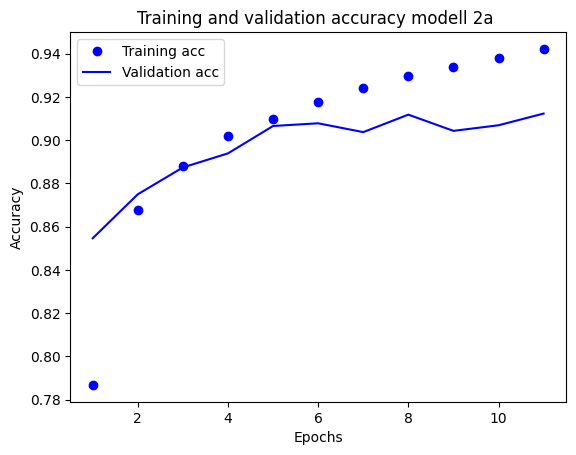

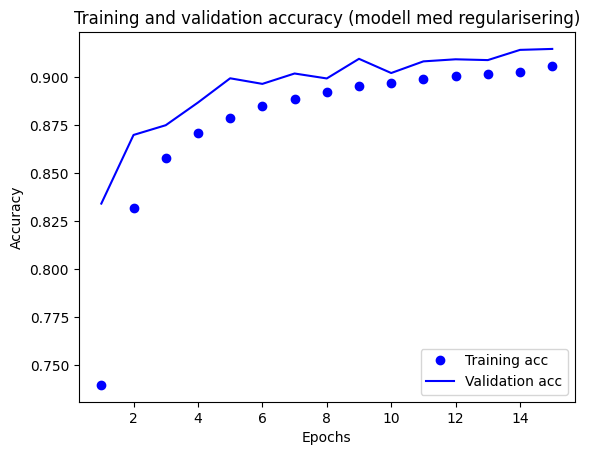

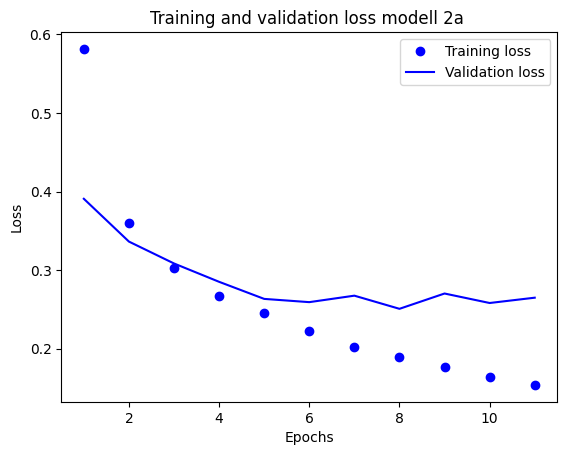

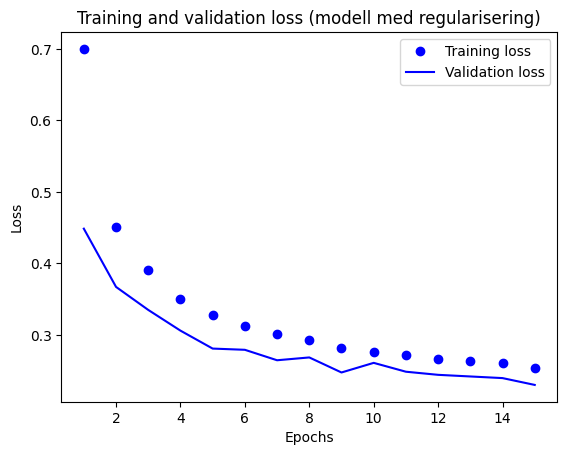

In [ ]:

# Skapar plottarna för att jämföra modellerna
epochrange = range(1, 11 + 1)
train_acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochrange2b = range(1, 15 + 1)
train_acc2b = history2b.history['categorical_accuracy']
val_acc2b = history2b.history['val_categorical_accuracy']

train_loss2b= history2b.history['loss']
val_loss2b = history2b.history['val_loss']

plt.plot(epochrange, train_acc, 'bo', label='Training acc')
plt.plot(epochrange, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy modell 2a ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(epochrange2b, train_acc2b, 'bo', label='Training acc')
plt.plot(epochrange2b, val_acc2b, 'b', label='Validation acc')
plt.title('Training and validation accuracy (modell med regularisering)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(epochrange, train_loss, 'bo', label='Training loss')
plt.plot(epochrange, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss modell 2a ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




plt.plot(epochrange2b, train_loss2b, 'bo', label='Training loss')
plt.plot(epochrange2b, val_loss2b, 'b', label='Validation loss')
plt.title('Training and validation loss (modell med regularisering)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Det är en stor skillnad på hur modellerna förbättras efter varje epok, modellen med regularisering överanpassar inte alls medan den bästa modellen från 1b med avbruten träning överanpassas och avbryter sin träning tidigare. Överanpassningen börjar runt epok 6.

Den regulariserade modellen har 15 epoker och den utan regularisering har 11, den slutgiltiga noggrannheten för modellen är något bätte på 90.7%.



**DEL 2C**

Byter ut optimizer från adam till sgd

In [ ]:

# The Keras model will be the simplest Keras model for NN networks.
# It is a single stack of layers connected sequentially.
model2c = Sequential([
# Add a convolution layer
Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),
# Dropout på 20% av noderna
Dropout(0.20),
### Lagt till ett faltningslager men med 32 filters
Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'),
MaxPooling2D(2),
# Dropout på 20% av noderna
Dropout(0.20),
### Lagt ett faltningslager och ändrar kärnor till 5
Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),
# Dropout på 20% av noderna
Dropout(0.20),
### Lagt till ännu ett faltningslager men med 32 filters
Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
# Lägger in poolning för att reducera beräkningstiden
MaxPooling2D(2),
# Flatten the input. This prepares the vector for fully connected layers.
Flatten(),

# Add a hidden Dense layer
Dense(units=16, activation='relu'),
# Add a an output layer. The output space is the number of classes
#    Softmax makes the output as probablity vector of the different classes
Dense(units=num_classes, activation='softmax')
])

model2c.compile(
  optimizer='sgd', ## Bytt från adam till sgd
  loss='categorical_crossentropy',
  metrics=['categorical_accuracy']
)

epochs = 15      ## Number of epoch to run
batch_size = 32  ## Mini batch size

# Train the model.
history2c = model2c.fit(
  train_images, to_categorical(train_labels),
  epochs=epochs,
  batch_size=batch_size,
  verbose = 1,
  validation_data=(val_images, to_categorical(val_labels)),
  callbacks=[earlystop] # Lägger in earlystopping i träningen
)

# Evaluate the model.
test_loss2c, test_acc2c = model2c.evaluate(test_images,to_categorical(test_labels))
print('Test accuracy: %.3f' % test_acc)

Epoch 1/15
1500/1500 [==============================] - 54s 35ms/step - loss: 1.6846 - categorical_accuracy: 0.4046 - val_loss: 0.7901 - val_categorical_accuracy: 0.7078
Epoch 2/15
1500/1500 [==============================] - 70s 47ms/step - loss: 0.7617 - categorical_accuracy: 0.7085 - val_loss: 0.6230 - val_categorical_accuracy: 0.7650
Epoch 3/15
1500/1500 [==============================] - 65s 43ms/step - loss: 0.6412 - categorical_accuracy: 0.7530 - val_loss: 0.5678 - val_categorical_accuracy: 0.7823
Epoch 4/15
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5725 - categorical_accuracy: 0.7803 - val_loss: 0.5027 - val_categorical_accuracy: 0.8036
Epoch 5/15
1500/1500 [==============================] - 55s 37ms/step - loss: 0.5247 - categorical_accuracy: 0.8016 - val_loss: 0.4676 - val_categorical_accuracy: 0.8273
Epoch 6/15
1500/1500 [==============================] - 53s 36ms/step - loss: 0.4919 - categorical_accuracy: 0.8167 - val_loss: 0.4460 - val_categoric

SGD som optimizer gör att träningen inte avbryts när 15 epoker körts, men modellen har inte bättre noggrannhet än de tidigare modellerna i uppgift 1 och 2.
Den lär sig inte lika snabbt och har möjligtvis fastnat runt ett lokalt minima vilket gör konvergeringen seg.

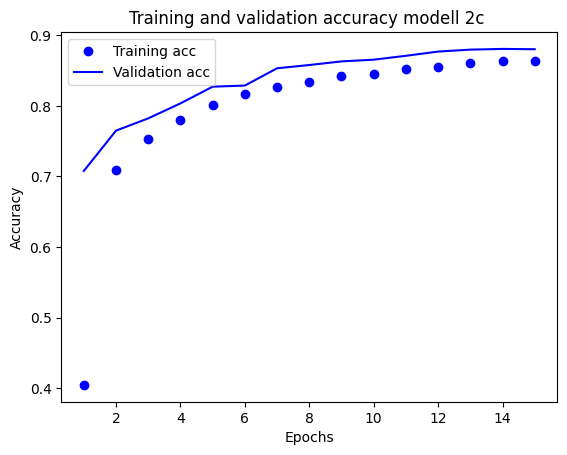

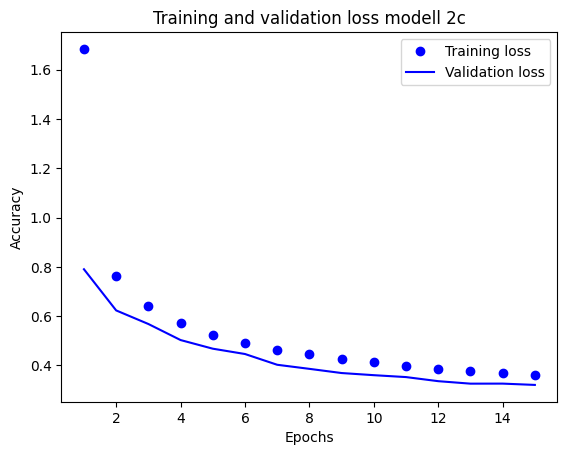

In [ ]:

epochrange2c = range(1, 15 + 1)
train_acc2c = history2c.history['categorical_accuracy']
val_acc2c = history2c.history['val_categorical_accuracy']

train_loss2c= history2c.history['loss']
val_loss2c = history2c.history['val_loss']

plt.plot(epochrange2c, train_acc2c, 'bo', label='Training acc')
plt.plot(epochrange2c, val_acc2c, 'b', label='Validation acc')
plt.title('Training and validation accuracy modell 2c ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(epochrange2c, train_loss2c, 'bo', label='Training loss')
plt.plot(epochrange2c, val_loss2c, 'b', label='Validation loss')
plt.title('Training and validation loss modell 2c')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Likt regulariserade modellen i uppgift 2 syns inte samma tecken på överanpassning som i 1b/2a.






**VG-DEL UPPGIFT 2**

313/313 [==============================] - 4s 12ms/step


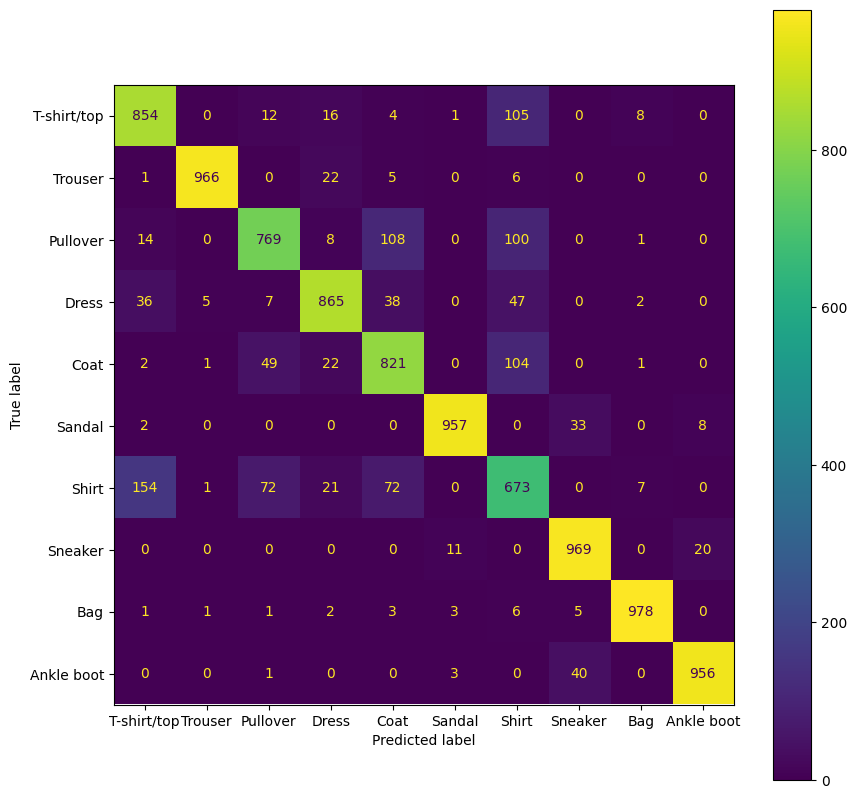

In [ ]:
# Tar fram prediktioner på test för sista modellen för att se vilka sorters plagg som modellen har problem med

# importerar funktioner för att skapa förväxlingsmatriser
from sklearn.metrics import   ConfusionMatrixDisplay, confusion_matrix


# Skapar prediktioner
y_pred = model2c.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# förväxlingsmatris
f_matrix = confusion_matrix(y_true=test_labels, y_pred=y_pred_classes)

# Visualiserar förväxlingsmatrisen för att se vilka plagg som är svårast
disp=ConfusionMatrixDisplay(confusion_matrix=f_matrix,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

Modellen presterar bättre på plagg som har en gulare färg på diagonalen och sämre för plagg som har en mörkare färg i förväxlingsmatrisen. Så de plaggen som modellen har svårt att prediktera är "Shirt", "Pullover","T-shirt/top",
"Pullover","Coat" och "Dress". det är alla plagg som placeras på överkroppen och har lite liknande mönster. En mer komplex modell hade förmodlingen kunnat skilja på dessa bättre.

# Uppgift 3


Tar modellen från 2b då den regulariserade bra, överanpassade inte och samtidigt fick samma noggrannhet som modellen utan dropout.

In [ ]:
import sys
if 'google.colab' in sys.modules:
  !pip install keras_tuner -q

import keras_tuner
print('Keras Tuner version:', keras_tuner.__version__)

# Get some tuner search functions
from keras_tuner.tuners import BayesianOptimization

# Kompletera denna kod med din modell
def build_model_MyModel(hp):
  model = tf.keras.Sequential([
    # Filters och kärnor till första faltningslagret
    # First Convolutional Layer5'
    tf.keras.layers.Conv2D(filters=hp.Int('conv_pre_filter', min_value=16, max_value=256, step=32, default=192),
                          kernel_size=hp.Choice('conv_pre_kernel', values = [3,5], default=3),
                          activation='relu',
                          padding='same',
                          input_shape=train_images[0].shape
                          ),
    tf.keras.layers.MaxPooling2D(2), # pooling


  ##### YOUR CODE HERE! #####
  # Lägger in lagren som fanns i modellen på 2b men med intervall för hyperparametrarna inom lagren

    tf.keras.layers.Dropout(0.2), # Dropout på 20% av noderna på faltningslagret som skapas nedan
    tf.keras.layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=96,max_value=320, step=32,default=192),
                        kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
                        activation='relu',
                        padding='same'),
    tf.keras.layers.MaxPooling2D(2),# lägger in pooling

    tf.keras.layers.Dropout(0.2), # Dropout på 20% av noderna på faltningslagret som skapas nedan
    tf.keras.layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=96,max_value=320, step=32,default=192),
                        kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
                        activation='relu',
                        padding='same'),
    tf.keras.layers.MaxPooling2D(2),# lägger in pooling

    tf.keras.layers.Dropout(0.2), # Dropout på 20% av noderna på faltningslagret som skapas nedan
    tf.keras.layers.Conv2D(filters=hp.Int('conv_3_filter', min_value=96,max_value=320, step=32,default=192),
                        kernel_size=hp.Choice('conv_3_kernel',values=[3,5]),
                        activation='relu',
                        padding='same'),
   tf.keras.layers.MaxPooling2D(2),# lägger in pooling på lager i loopen


  # Lägger in ett dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=256, step=32,default=128),
                  activation='relu'),


  # A Final Dense Layer
    tf.keras.layers.Dense(units=num_classes, activation='softmax')
  ])

  ##### You can also try some other learning rates in the next line, or use another optimizer with other parameters
  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3])),
              loss='categorical_crossentropy', # Kör inte med sparse_ utan fick ändra för att koden skulle kunna köras
              metrics=['categorical_accuracy'])

  return model

Keras Tuner version: 1.3.4


In [ ]:
# To get more stable results we are repeating the runs two times for each parameter setup
MAX_TRIALS = 15         # represents the number of hyperparameter combinations that will be tested by the tuner
EXECUTION_PER_TRIAL = 2 # the number of models that should be built and fit for each trial for robustness purposes

# To have batch_size as a hyperparameter we need to define our own tuner
# In this case, we are basing it on the BayesianOptimization tuner found in
# https://keras-team.github.io/keras-tuner/documentation/tuners/#bayesianoptimization-class
class MyTuner(keras_tuner.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 32, 192, step=32, default=64)

    return super(MyTuner, self).run_trial(trial, *args, **kwargs)

# Bayesian search which also searches for batch_size
tuner = MyTuner(
    build_model_MyModel,
    max_trials=MAX_TRIALS,
    objective='val_categorical_accuracy', # Fick inte koden att funkgera med val_acc utan ändrade till categorical eftersom det är klassificering med 10 grupper
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='output',
    overwrite=True,
    num_initial_points=10, # Start with 10 random points and then do more structured search
    project_name='Labb 1 optimizer'
)


In [ ]:

# Do the hyperparameter search
# I set the no of epochs to 6 to speed up the search in this excersise, better would have been 10
noepochauto = 6   ## Max number of epochs per trail (but we have early stopping so this max is probably not reached)
es = tf.keras.callbacks.EarlyStopping('val_loss', patience=2, restore_best_weights = True)
# Note we do not need to_catagorical as we use loss='sparse_categorical_crossentropy'
tuner.search(train_images, to_categorical(train_labels),
             epochs=noepochauto,
             validation_data=(val_images,to_categorical(val_labels)),
             callbacks=[es])

Trial 15 Complete [00h 01m 23s]
val_categorical_accuracy: 0.9167083203792572

Best val_categorical_accuracy So Far: 0.9208750128746033
Total elapsed time: 00h 36m 55s


In [ ]:
# Get the best model so far
model = tuner.get_best_models(num_models=1)[0]
# Dump the best hyperparameters found
vals = tuner.get_best_hyperparameters(num_trials=5)[4].values
for keys,values in vals.items():
    print('%20s = %3.4g' %(keys,values))

model.summary()

     conv_pre_filter =  16
     conv_pre_kernel =   3
       conv_1_filter = 128
       conv_1_kernel =   5
       conv_2_filter = 128
       conv_2_kernel =   3
       conv_3_filter =  96
       conv_3_kernel =   5
       dense_1_units = 192
       learning_rate = 0.001
          batch_size =  64
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 80)        800       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 80)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 80)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 96)        192096    
                     

Antalet parametrar i modellen är nu runt 1.6 miljoner jämfört med basemodellen som låg på runt 200 tusen stycken.

Max trials är ändrat till 15 st för att spara tid nu när jag kör om med ändrade värden, har tex sänkt max på batch_size då alla bra modeller hade låga värden där samt ökat filters för alla faltningslager då alla bra modeller låg nära mitt första gränsvärde där.

In [ ]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(test_images,to_categorical(test_labels))
print('Test accuracy: %.3f' % test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.2310 - categorical_accuracy: 0.9200
Test accuracy: 0.920


Noggranheten för modellen som hittats med att tunea hyperparametrarna får en pricksäkerhet på 92%, och detta är ju endast efter 6 epoker vilket är en bra ökning från de tidigare modellerna.

**Testar flera modeller och printar resultaten och några hyperparametrar från de 5 bästa**

In [ ]:
# Let us dump the n-best

if True:
  explorenbest = 5

  # Suppress warnings about optimizer state not being restored by tf.keras.
  tf.get_logger().setLevel('ERROR')

  # Print a heading
  vals = tuner.get_best_hyperparameters(num_trials=explorenbest)[0].values
  print('Test accuracy ', end = '')
  for keys,values in vals.items():
      print('%15s ' %(keys), end = '')
  print('\n')

  # Now print each trail on a seperate row from best to worst
  for ix in range(0,explorenbest):
    # evaluate this trail
    model = tuner.get_best_models(num_models=explorenbest)[ix]
    test_loss, test_acc = model.evaluate(test_images,to_categorical(test_labels), verbose=0)
    print('%15.3f ' % test_acc , end = '')
    # get this trail's hyperparameters
    vals = tuner.get_best_hyperparameters(num_trials=explorenbest)[ix].values
    for keys,values in vals.items():
      print('%15.4g ' %(values), end = '')
    # end this line and start the trail
    print()


Test accuracy conv_pre_filter conv_pre_kernel   conv_1_filter   conv_1_kernel   conv_2_filter   conv_2_kernel   conv_3_filter   conv_3_kernel   dense_1_units   learning_rate      batch_size 

          0.920              80               3              96               5             192               3             256               5              32           0.001              96 
          0.916             112               3              96               5             160               3             320               5              32           0.001              96 
          0.919              48               3             160               3             128               5             288               5             192           0.001              64 
          0.917              16               3              96               5             160               3             256               5              96           0.001              96 
          0.914              16     

**Jämförelse av värden**

* Antal filter/noder per lager: Antalet filter/noder skiljer sig mycket mot den modellen jag skapat för hand, det första faltningslagret har dock samma antal filter som jag hade, men många av de andra toppmodellerna har helt skilda värden.

* Antal kärnor: Det verkar som att antalet kärnor förändras mellan faltningslagren, det första har 3 kärnor i alla av de bra modellerna medan 2 av de 3 andra faltningslagren har 5 kärnor i de flesta fall.


**Prestandan per fall**
Noggranheten är betydligt högre för alla dessa modeller än de tidigare skapade och det skiljer lite mellan modellernas noggrannhet och filter/noder skiljer också en del mellan lagren för modellerna.

**Parametrar vid gränsvärden**

Många av faltningsnätens filter ligger nära gränsvärden vid min första körning så jag ökade från 256 till 320 och körde om, sista falrningslagret får värden som är vid gränsvärdet så en till ökning bör göras och köras om för att kunna hitta ännu bättre modeller.

**Mest betydelsefulla hyperparametrar**

Nu körde jag tillslut endast en modell med 1 learning rate men det är en av de viktigaste parametrarna, därav valde jag direkt den lägre för att få en bättre noggrannhet i förlust av tid, då det tar längre tid när den är låg.

Eftersom många hyperparametrar har samma värde i många kolumner så anser jag att det är dem som är viktigast, då samma värden i dessa i princip genererar samma noggrannhet.(Kärnor, filters)

Den nästa bästa modellens kärnor på 2 av faltningslagren går ifrån mönstret för de andra men det är samma antal kärnor som använts för hela modellen, så i vilken ordning dem är i modellen verkar inte spela sådan stor roll sålänge de inte är första eller sista faltningslagret.

**Trend**

Det är färre filters i början på modellen och att de senare lager har fler. Alltså en ökande trend för filter i faltningslagren.



**fortsätter träna bästa modellen med 30 epoker istället för 6**

In [ ]:
# Fine-tune the model using the best parameters found as we might not be fully trained
model = tuner.get_best_models(num_models=1)[0]

epochs = 30      ## (max) number of epoch to run
opt_batch_size = tuner.get_best_hyperparameters()[0]['batch_size']

# Set callback functions to early stop training
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=2, restore_best_weights = True)]

# Continue to train the model. (note that we are continuing from the training done during tuning)
history = model.fit(
  train_images,to_categorical( train_labels),
  epochs=epochs,
  batch_size=opt_batch_size,
  verbose = 1,
  validation_data=(val_images, to_categorical(val_labels)),
  # initial_epoch=noepochauto, ## how to get this number???? from... "(root).optimizer.iter" maybe
  callbacks=callbacks
)

Epoch 1/30
500/500 [==============================] - 9s 14ms/step - loss: 0.1824 - categorical_accuracy: 0.9320 - val_loss: 0.2202 - val_categorical_accuracy: 0.9193
Epoch 2/30
500/500 [==============================] - 7s 14ms/step - loss: 0.1722 - categorical_accuracy: 0.9355 - val_loss: 0.2106 - val_categorical_accuracy: 0.9234
Epoch 3/30
500/500 [==============================] - 6s 13ms/step - loss: 0.1617 - categorical_accuracy: 0.9388 - val_loss: 0.2240 - val_categorical_accuracy: 0.9186
Epoch 4/30
500/500 [==============================] - 7s 14ms/step - loss: 0.1494 - categorical_accuracy: 0.9436 - val_loss: 0.2169 - val_categorical_accuracy: 0.9202
Epoch 4: early stopping


Den slutade snabbt att förbättras och early stopping sattes in så den avslutade efter 4 epoker till.

In [ ]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(test_images,to_categorical(test_labels))
print('Test accuracy: %.3f' % test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.2207 - categorical_accuracy: 0.9234
Test accuracy: 0.923


Nu kommer testnoggrannheten upp till 92.3% så den extra träningen gav modellen lite bättre prestanda.

In [ ]:
# See what we got and how many parameters are used
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 80)        800       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 80)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 80)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 96)        192096    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 96)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 96)          0



**Flera experiment**
Anledningen att det är bra att köra flera experiment är att slumpmässigheten reduceras och resultatet blir mer pålitligt om alla experiment ger liknande resultat.




**Kod för att testa olika många lager**

In [ ]:
import sys
if 'google.colab' in sys.modules:
  !pip install keras_tuner -q

import keras_tuner
print('Keras Tuner version:', keras_tuner.__version__)

# Get some tuner search functions
from keras_tuner.tuners import BayesianOptimization

# Kompletera denna kod med din modell
def build_model_MyModel(hp):
  # Filer och kärnor till första faltningslagret
  filter1=hp.Int('conv_pre_filter', min_value=16, max_value=256, step=32, default=192)
  kernel1=hp.Choice('conv_pre_kernel', values = [3,5], default=3)
  model = Sequential()
    # First Convolutional Layer5'
  model.add(Conv2D(filters=filter1,
                          kernel_size=kernel1,
                          activation='relu',
                          padding='same',
                          input_shape=train_images[0].shape
                          ))
  model.add(MaxPooling2D(2)) # pooling


  ##### YOUR CODE HERE! #####
  # Gör en loop som ska testa att lägga in olika antal faltningslager(Mellan 2 och 5) med olika hyperparametervärden
  no_layers = hp.Int('num_layers', min_value=2, max_value=5)
  for i in range(no_layers):
        model.add(Dropout(0.2)) # Dropout på 20% av noderna på faltningslagret som skapas nedan
        model.add(Conv2D(filters=hp.Int(f'conv_{i+1}_units', min_value=16,max_value=256, step=32,default=192),
                        kernel_size=hp.Choice(f'conv_{i+1}_kernel',values=[3,5]),
                        activation='relu',
                        padding='same'))
  model.add(MaxPooling2D(2))# lägger in pooling på lager i loopen


  # Lägger in ett dense layer
  model.add(Flatten())
  model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=256, step=32,default=128),
                  activation='relu'))


  # A Final Dense Layer
  model.add(Dense(units=num_classes, activation='softmax'))


  ##### You can also try some other learning rates in the next line, or use another optimizer with other parameters
  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3])),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

  return model

# To get more stable results we are repeating the runs two times for each parameter setup
MAX_TRIALS = 15         # represents the number of hyperparameter combinations that will be tested by the tuner
EXECUTION_PER_TRIAL = 2 # the number of models that should be built and fit for each trial for robustness purposes

# To have batch_size as a hyperparameter we need to define our own tuner
# In this case, we are basing it on the BayesianOptimization tuner found in
# https://keras-team.github.io/keras-tuner/documentation/tuners/#bayesianoptimization-class
class MyTuner(keras_tuner.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 32, 512, step=32, default=256)

    return super(MyTuner, self).run_trial(trial, *args, **kwargs)

# Bayesian search which also searches for batch_size
tuner = MyTuner(
    build_model_MyModel,
    max_trials=MAX_TRIALS,
    objective='val_categorical_accuracy',
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='output',
    overwrite=True,
    num_initial_points=10, # Start with 10 random points and then do more structured search
    project_name='Labb 1 optimizer'
)


# Do the hyperparameter search
# I set the no of epochs to 6 to speed up the search in this excersise, better would have been 10
noepochauto = 6   ## Max number of epochs per trail (but we have early stopping so this max is probably not reached)
es = tf.keras.callbacks.EarlyStopping('val_loss', patience=2, restore_best_weights = True)
# Note we do not need to_catagorical as we use loss='sparse_categorical_crossentropy'
tuner.search(train_images,to_categorical( train_labels),
             epochs=noepochauto,
             validation_data=(val_images, to_categorical(val_labels)),
             callbacks=es)

# Get the best model so far
model = tuner.get_best_models(num_models=1)[0]
# Dump the best hyperparameters found
vals = tuner.get_best_hyperparameters(num_trials=5)[4].values
for keys,values in vals.items():
    print('%20s = %3.4g' %(keys,values))

model.summary()

Jag har inte kört färdigt den här sista koden för VG då det tog otroligt lång tid men har testkört den så den ska fungera.